<a href="https://colab.research.google.com/github/Rugiyya1/Hands-on-ML/blob/main/California_housing_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt


In [ ]:
housing = pd.read_csv('/content/housing.csv')

In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


#EDA

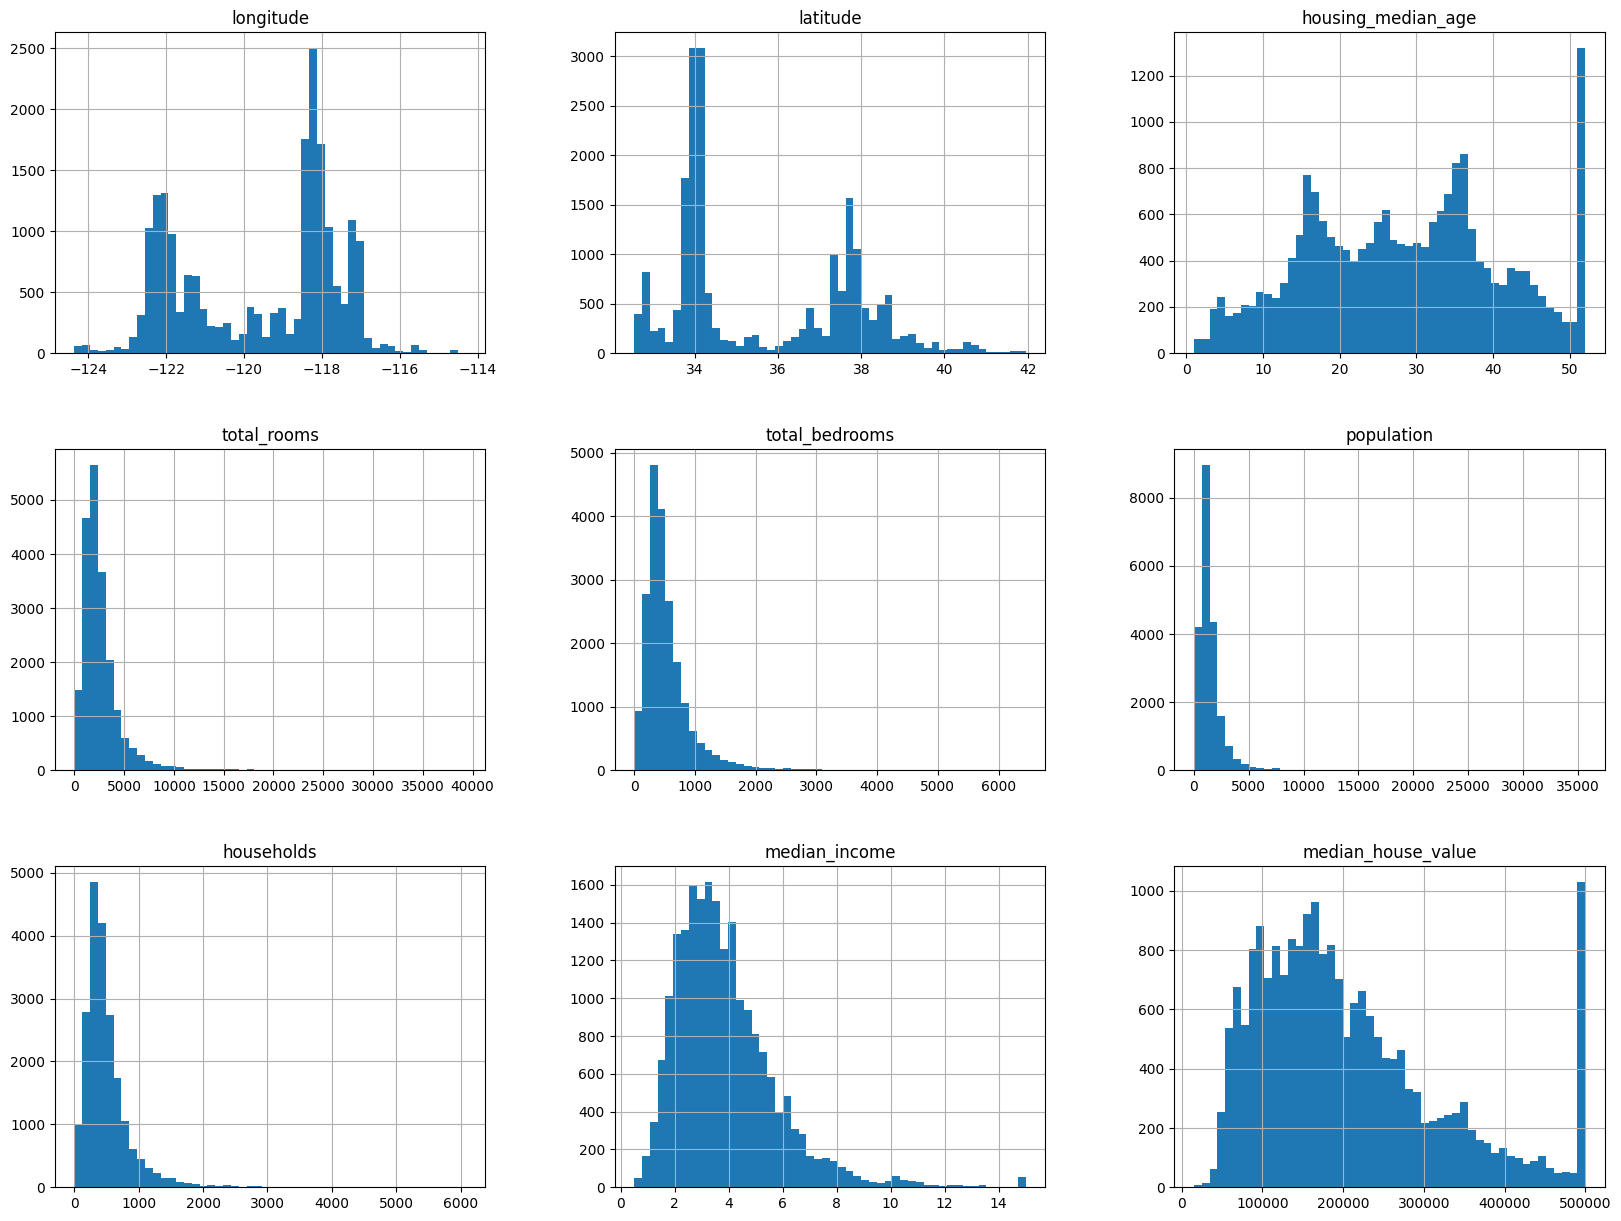

In [ ]:
housing.hist(bins =50, figsize=(20,15))
plt.show()

In [ ]:
## Create test data

import numpy as np

from sklearn.model_selection import train_test_split

In [ ]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [ ]:
## experts mentioned that median income is very important attribute for prediction of median house pricing
## you need to ensure that test set is rigtly represent various categories in the dataset

In [ ]:
## create income category

housing['income_cat']=pd.cut(housing['median_income'],
                             bins =[0,1.5,3.0, 4.5, 6, np.inf],
                             labels =[1,2,3,4,5])

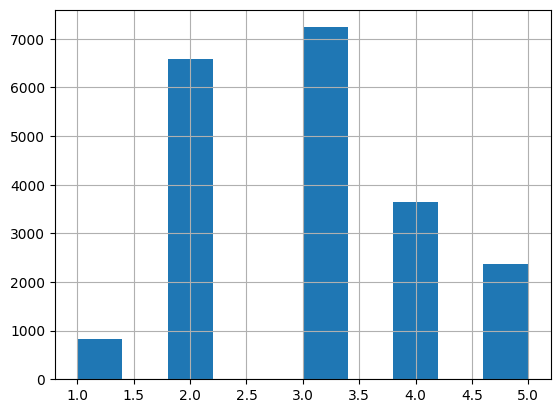

In [ ]:
#histogram of income categories
housing.income_cat.hist()
plt.show()

In [ ]:
# now we can do stratified sampling for test set based on income cat.

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing['income_cat']):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

In [ ]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [ ]:
## now remove income_cat column

for set_ in (strat_train_set, strat_test_set):
  set_.drop('income_cat', axis=1, inplace=True)

## Discovering and Visualizing

In [ ]:
## when visualizing , train set is utilized. if train set is big, some sample will be used to explore. here train set is not small

In [ ]:
housing = strat_train_set.copy() # copied to avoid harming train set itself

<Axes: xlabel='longitude', ylabel='latitude'>

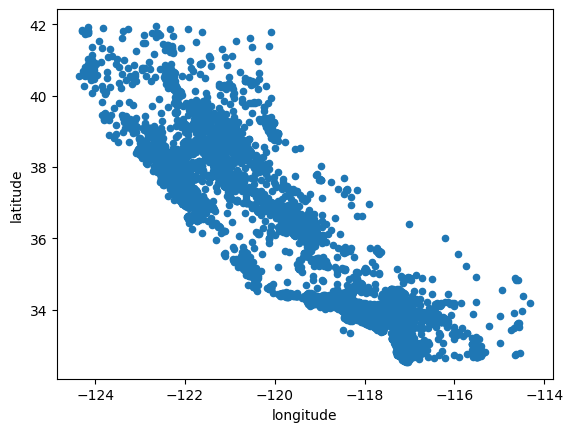

In [ ]:
#Visualize geographical data

housing.plot(kind ='scatter', x='longitude', y='latitude')

<Axes: xlabel='longitude', ylabel='latitude'>

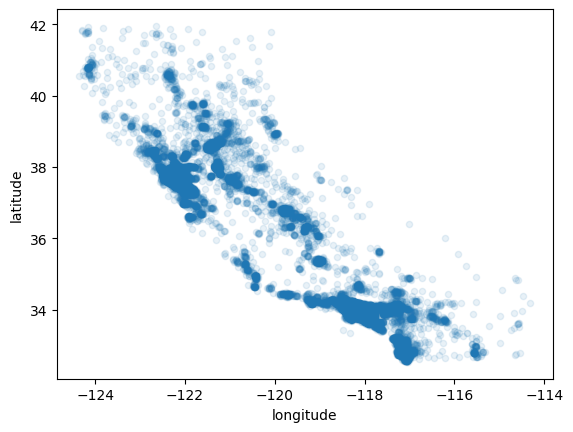

In [ ]:
#California is visible from above plot, but other patterns are not. lets set alpha to 0.1 to provide density view


housing.plot(kind ='scatter', x='longitude', y='latitude', alpha=0.1)

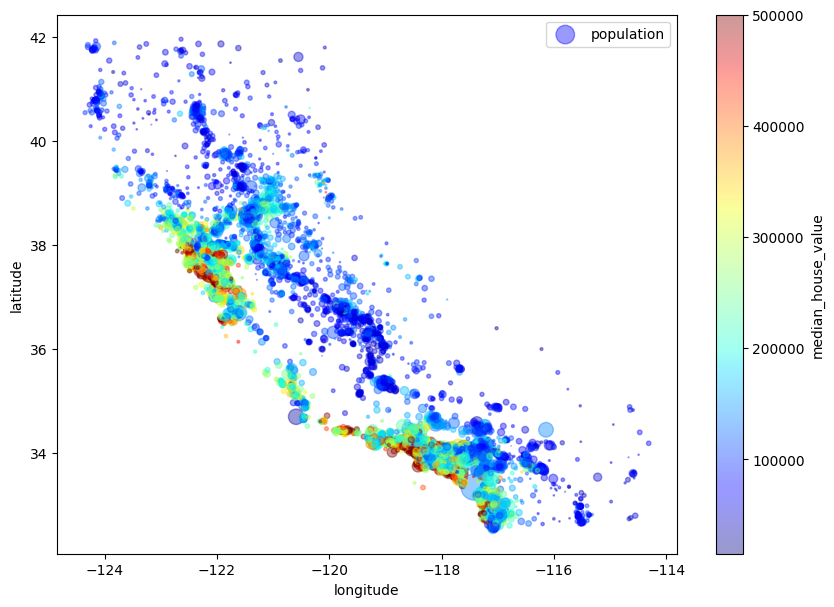

In [ ]:
## now let's include prices of the houses


housing.plot(kind ='scatter', x='longitude', y='latitude', alpha=0.4,
             s=housing['population']/100, label='population', figsize=(10,7),
             c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()

## Looking for correlations

In [ ]:
## for small dataset, Pearson corr is easily computable
corr_matrix=housing.corr()

<ipython-input-133-7bad612f137a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=housing.corr()


In [ ]:
corr_matrix['median_house_value'].sort_values(ascending=False) # checking correlation of attributes with median_house_value

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

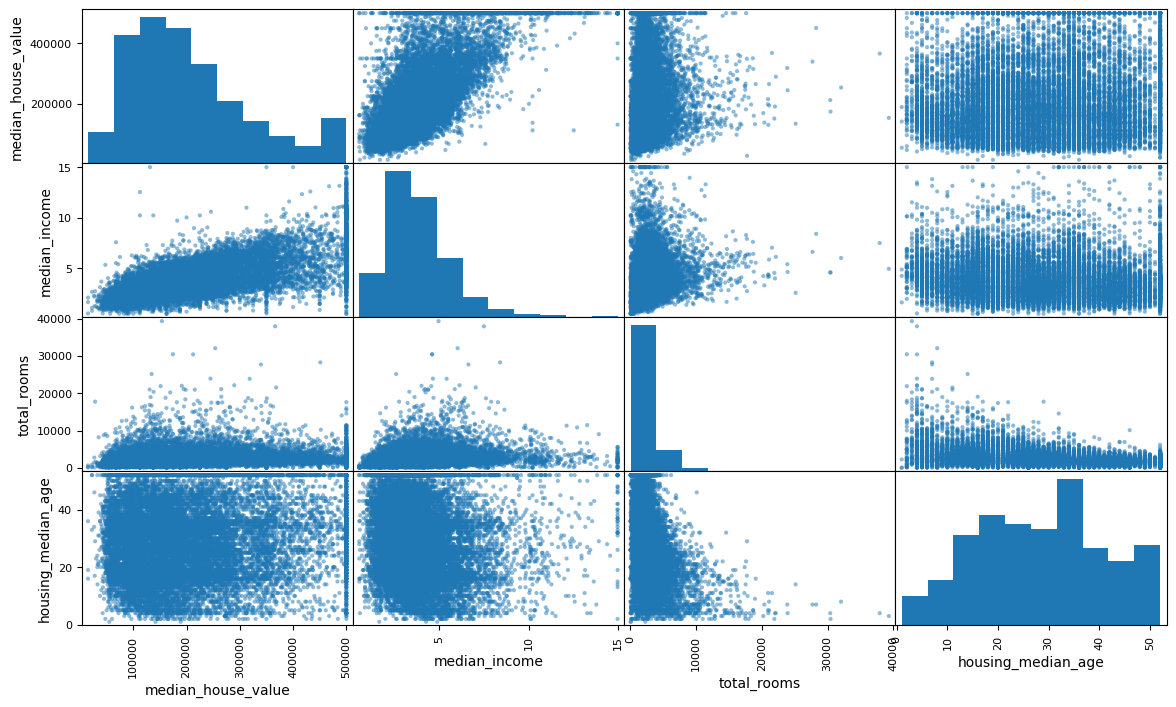

In [ ]:
## another way to check corr is to use scatter_matrix. Lets check few of promising attruibutes

from pandas.plotting import scatter_matrix
attributes =['median_house_value', 'median_income', 'total_rooms',
             'housing_median_age']

scatter_matrix(housing[attributes], figsize=(14,8))
plt.show()

<Axes: xlabel='median_income', ylabel='median_house_value'>

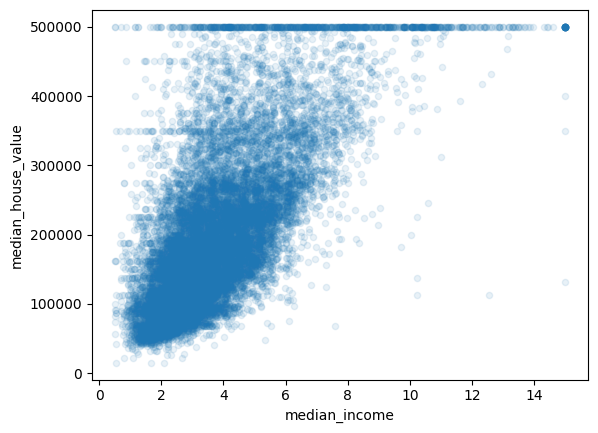

In [ ]:
#most promising attribute is median house value
#lets zoom in

housing.plot(kind='scatter', x='median_income', y='median_house_value',
             alpha=0.1)

## experimenting with attribute combinations

In [ ]:
housing['rooms_per_household']=housing['total_rooms']/housing['households']
housing['bedrooms_per_room']=housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household']=housing['population']/housing['households']

In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,6.096552,0.182692,3.167241


In [ ]:
corr_matrix=housing.corr()


<ipython-input-139-24f1388fa994>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=housing.corr()


In [ ]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

# Prepare Data for ML algorithms

In [ ]:
#revert to clean train set. seperate label data
housing=strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [ ]:
## Data Cleaning

In [ ]:
## dealing with missing values
#option1: housing.dropna(subset=['total_bedrooms'])
#option2: housing.drop('total_bedrooms', axis=1)

#option3: median=housing['total_bedrooms'].median() #always save median value, you will use in test set and new data
#housing['total_bedrooms'].fillna(median, inplace=True)

In [ ]:
# SimpleImputer

from sklearn.impute import SimpleImputer

imputer =SimpleImputer(strategy='median')

In [ ]:
# median can be only used for numerical data, so cat attributes should be removed

housing_num = housing.drop('ocean_proximity', axis=1)

In [ ]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [ ]:
# although only total_bedrooms attribute had missing values, we cannot make sure new data wont have missing values.
#so simple imputer applied to all numerical data

#median values of all attributes goes to statistics_
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [ ]:
# the same as above
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [ ]:
## transforming training set

X=imputer.transform(housing_num)

In [ ]:
##the results is in Numpy array, so lets put it into dataframe

housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [ ]:
## Handling text and cat variables

In [ ]:
housing_cat=housing[['ocean_proximity']]

In [ ]:
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [ ]:
#covert cat to num as most ML algorithms can work only with num data

from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder=OrdinalEncoder()

In [ ]:
housing_cat_encoded =ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [ ]:
ordinal_encoder.categories_ # to get lists for cat features

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
## this encoding will be issue, as it will take near numbers similar. however n our case number 0 and 4 have more similarity .
# ordinal encoder is better for ordered categories

# lets us e another one-hot encoding

from sklearn.preprocessing import OneHotEncoder
cat_encoder =OneHotEncoder()

housing_cat_1hot=cat_encoder.fit_transform(housing_cat)

In [ ]:
housing_cat_1hot # this case output is SciPy sparse matrix rahter than numpy array

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [ ]:
# can be coverted to numpy array like
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

##Custom Transformer

In [ ]:
## just sometimes it will not be sure that adding features will work for ML. So with quick ways we can check the difference

In [ ]:
## above combined attributes coding will be provided in transformer

from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix =3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):

  def __init__(self, add_bedrooms_per_room=True): #no *args or **kargs
      self.add_bedrooms_per_room=add_bedrooms_per_room

  def fit(self, X, y=None):
    return self # nothing else to do

  def transform(self, X,y=None):
    rooms_per_household =X[:, rooms_ix]/X[:, households_ix]
    population_per_household =X[:, population_ix] / X[:, households_ix]

    if self.add_bedrooms_per_room:
      bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
      return np.c_[X, rooms_per_household, population_per_household,
                   bedrooms_per_room]
    else:
      return np.c_[X, rooms_per_household, population_per_household]




In [ ]:
attr_adder =CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

##Feature Scaling/ Transformation pipelines

In [ ]:
#small pipeline for num features:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

In [ ]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [ ]:
## using single ransformer for both cat and num features

from sklearn.compose import ColumnTransformer

num_attribs =list(housing_num) # getting list of num columns
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs),
])


In [ ]:
housing_prepared = full_pipeline.fit_transform(housing)

#Selecting and Training the model

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [ ]:
#let's check the model

ex_data = housing.iloc[:5]
ex_label = housing_labels.iloc[:5]
ex_data_prep = full_pipeline.transform(ex_data)

In [ ]:
print('Predictions: ', lin_reg.predict(ex_data_prep))

Predictions:  [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


In [ ]:
print('Labels: ', list(ex_label))

Labels:  [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [ ]:
## Let's measure RMSE

from sklearn.metrics  import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)

lin_rmse = np.sqrt(lin_mse)

lin_rmse


68627.87390018745

In [ ]:
## for the house value mostly ranging between 120k and 265k$, 68K error is not satisfying. This is example of underfitting data
# features dont provide enough info or the model is not powerful enough

In [ ]:
# lets try more powerful model -DecisionTree

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [ ]:
housing_predictions =tree_reg.predict(housing_prepared)
tree_mse =mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)

tree_rmse

0.0

In [ ]:
### Overfittinggg!! to make sure about it lets use cross-validation

## Better Evaluation using Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(tree_reg, housing_prepared, housing_labels,
                       scoring ='neg_mean_squared_error', cv=10)

tree_rmse_scores = np.sqrt(-scores)

In [ ]:
def display_scores(scores):
  print('Scores: ', scores)
  print('Mean: ', scores.mean())
  print('Standard deviation: ', scores.std())

In [ ]:
display_scores(tree_rmse_scores)

Scores:  [71880.71186217 70758.99626011 68811.9488865  72670.36821427
 68558.07220158 75741.33408494 72058.90523585 73303.89167364
 68118.52363837 71202.77979851]
Mean:  71310.55318559511
Standard deviation:  2250.855040023175


In [ ]:
# now it is visible that DT performs worse than Linearregression. Decision tree is overfitting, so performs badly than Linear regression

In [ ]:
## try another model -Random Forest

from sklearn.ensemble import RandomForestRegressor

forest_reg =RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
scores=cross_val_score(forest_reg, housing_prepared, housing_labels,
                       scoring ='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-scores)

In [ ]:
display_scores(forest_rmse_scores)

Scores:  [51607.25891345 48702.26451726 46683.522601   52195.75590957
 47449.79359149 52075.31431947 52602.39030125 49916.58803311
 48596.91274709 53689.73587818]
Mean:  50351.95368118783
Standard deviation:  2280.8272795270373


## Fine-Tune model

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid =[
    {'n_estimators': [3,10,30], 'max_features':[2,4,6,8]},
    {'bootstrap':[False], 'n_estimators':[3,10], 'max_features':[2,3,4]},
]

forest_reg=RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

##Evaluation

In [ ]:
final_model = grid_search.best_estimator_

In [ ]:
final_model

RandomForestRegressor(max_features=6, n_estimators=30)

In [ ]:
X_test = strat_test_set.drop('median_house_value', axis=1)
y_test=strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions =final_model.predict(X_test_prepared)

In [ ]:
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

48141.089629178554

In [ ]:
## lets produce confidence interval rather than point error

from scipy import stats
confidence=0.95
squared_errors = (final_predictions -y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors) -1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([46097.44628259, 50101.4417716 ])